In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.shape

(1338, 7)

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

In [13]:
data['sex'] = data['sex'].replace({'female':1, 'male':0})

In [14]:
data['smoker'] = data['smoker'].replace({'yes':1, 'no':0})

In [15]:
data = data.drop('region', axis = 1)

In [16]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


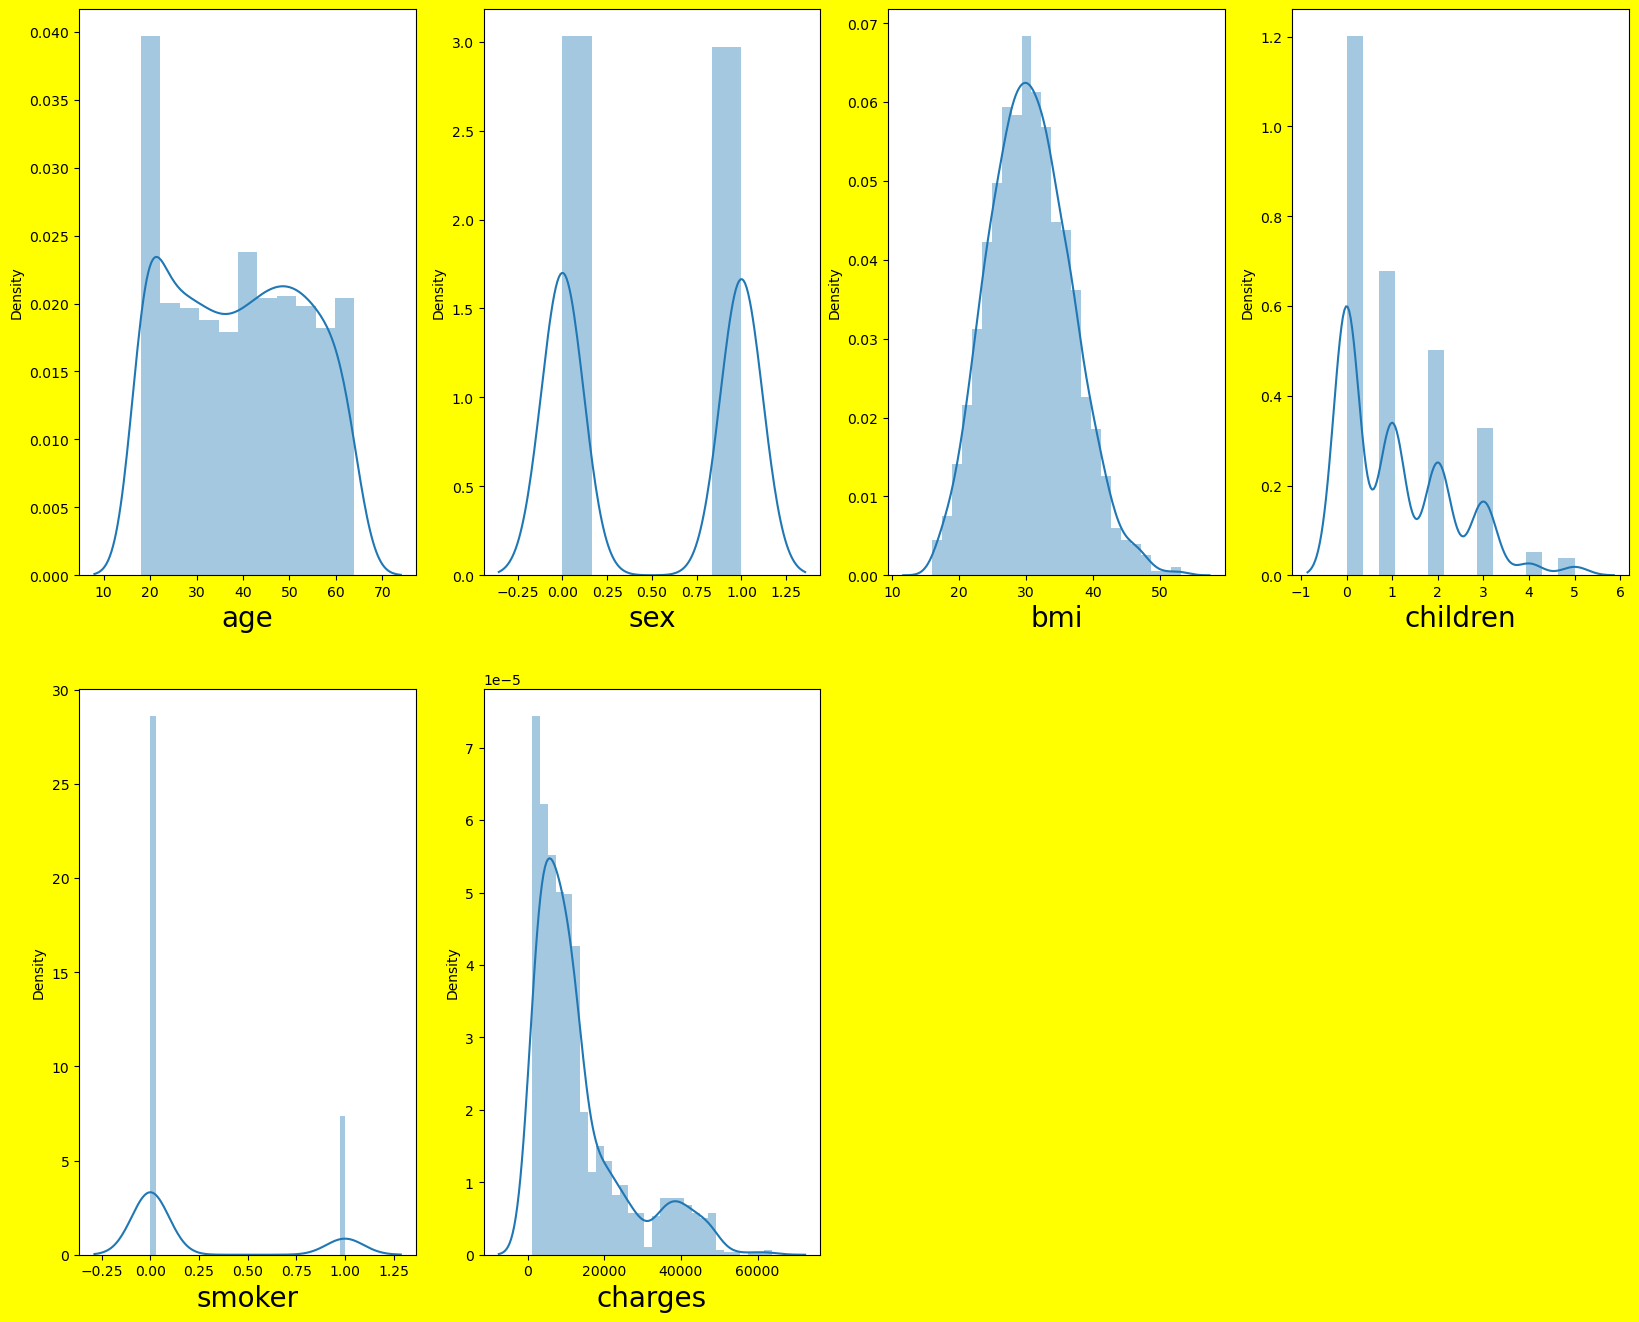

In [17]:
plt.figure(figsize=(20,25),facecolor= 'yellow')
plotnumber = 1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.show()

In [18]:
data_feature = data.drop('charges', axis = 1)

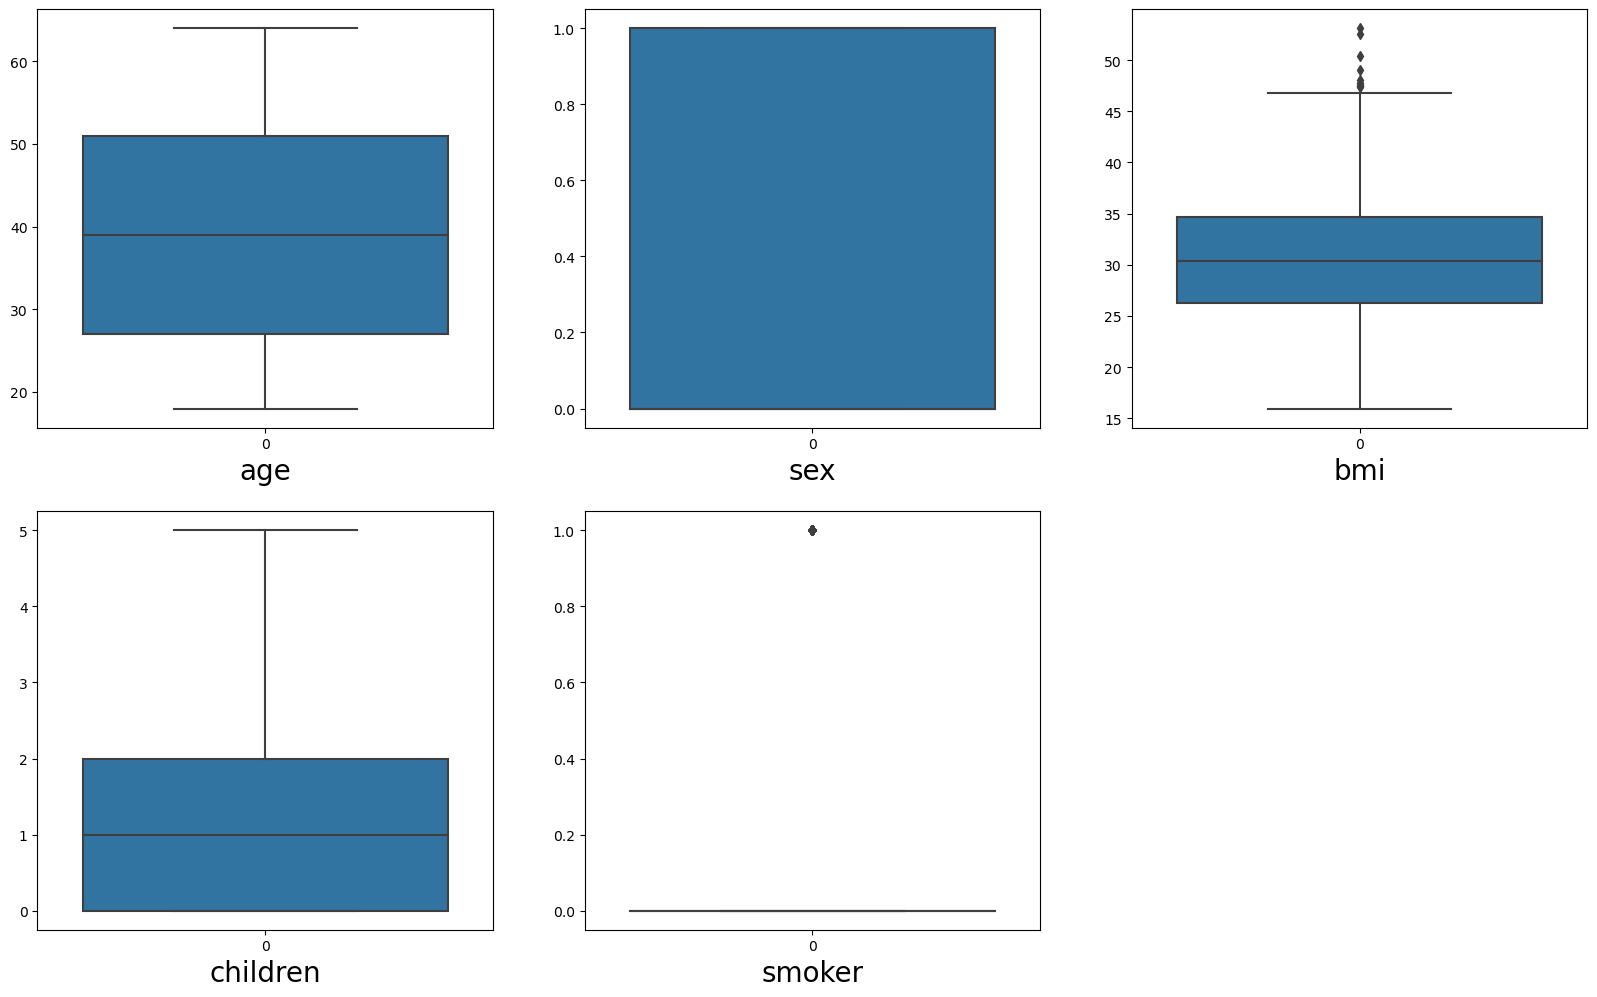

In [19]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data_feature:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(data_feature[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.show()

In [20]:
Q1 = data.quantile(0.25)

Q3 = data.quantile(0.75)

IQR = Q3 - Q1

In [21]:
bmi_h = (Q3.bmi + (1.5 * IQR.bmi))
bmi_h

47.290000000000006

In [23]:
index_bmi = np.where(data['bmi'] > bmi_h)
index_bmi

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317]),)

In [24]:
data = data.drop(data.index[index_bmi])
data.shape

(1329, 6)

In [25]:
data.reset_index()

,index,age,sex,bmi,children,smoker,charges
0,0,19,1,27.900,0,1,16884.92400
1,1,18,0,33.770,1,0,1725.55230
2,2,28,0,33.000,3,0,4449.46200
3,3,33,0,22.705,0,0,21984.47061
4,4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...,...
1324,1333,50,0,30.970,3,0,10600.54830
1325,1334,18,1,31.920,0,0,2205.98080
1326,1335,18,1,36.850,0,0,1629.83350
1327,1336,21,1,25.800,0,0,2007.94500


In [26]:
smoker_h = (Q3.smoker + (1.5 * IQR.smoker))
smoker_h

0.0

In [27]:
index_smoker = np.where(data['smoker'] > smoker_h)
index_smoker

(array([   0,   11,   14,   19,   23,   29,   30,   34,   38,   39,   49,
          52,   53,   55,   57,   58,   64,   69,   70,   82,   84,   85,
          86,   92,   94,   98,   99,  103,  105,  109,  116,  122,  125,
         127,  141,  143,  145,  152,  155,  156,  157,  159,  160,  174,
         184,  202,  206,  222,  223,  234,  237,  239,  243,  249,  250,
         251,  253,  255,  258,  260,  261,  262,  264,  265,  270,  279,
         280,  286,  290,  294,  295,  296,  299,  310,  312,  320,  325,
         326,  328,  329,  336,  360,  371,  373,  374,  375,  378,  379,
         408,  409,  414,  416,  417,  418,  419,  438,  441,  458,  462,
         471,  472,  473,  485,  491,  497,  499,  500,  511,  521,  527,
         541,  545,  554,  565,  573,  583,  589,  600,  603,  605,  611,
         613,  614,  617,  619,  625,  634,  637,  651,  660,  661,  663,
         664,  670,  673,  678,  685,  693,  702,  721,  723,  726,  732,
         734,  735,  737,  738,  746, 

In [28]:
data = data.drop(data.index[index_smoker])
data.shape

(1058, 6)

In [29]:
data.reset_index()

,index,age,sex,bmi,children,smoker,charges
0,1,18,0,33.770,1,0,1725.55230
1,2,28,0,33.000,3,0,4449.46200
2,3,33,0,22.705,0,0,21984.47061
3,4,32,0,28.880,0,0,3866.85520
4,5,31,1,25.740,0,0,3756.62160
...,...,...,...,...,...,...,...
1053,1332,52,1,44.700,3,0,11411.68500
1054,1333,50,0,30.970,3,0,10600.54830
1055,1334,18,1,31.920,0,0,2205.98080
1056,1335,18,1,36.850,0,0,1629.83350


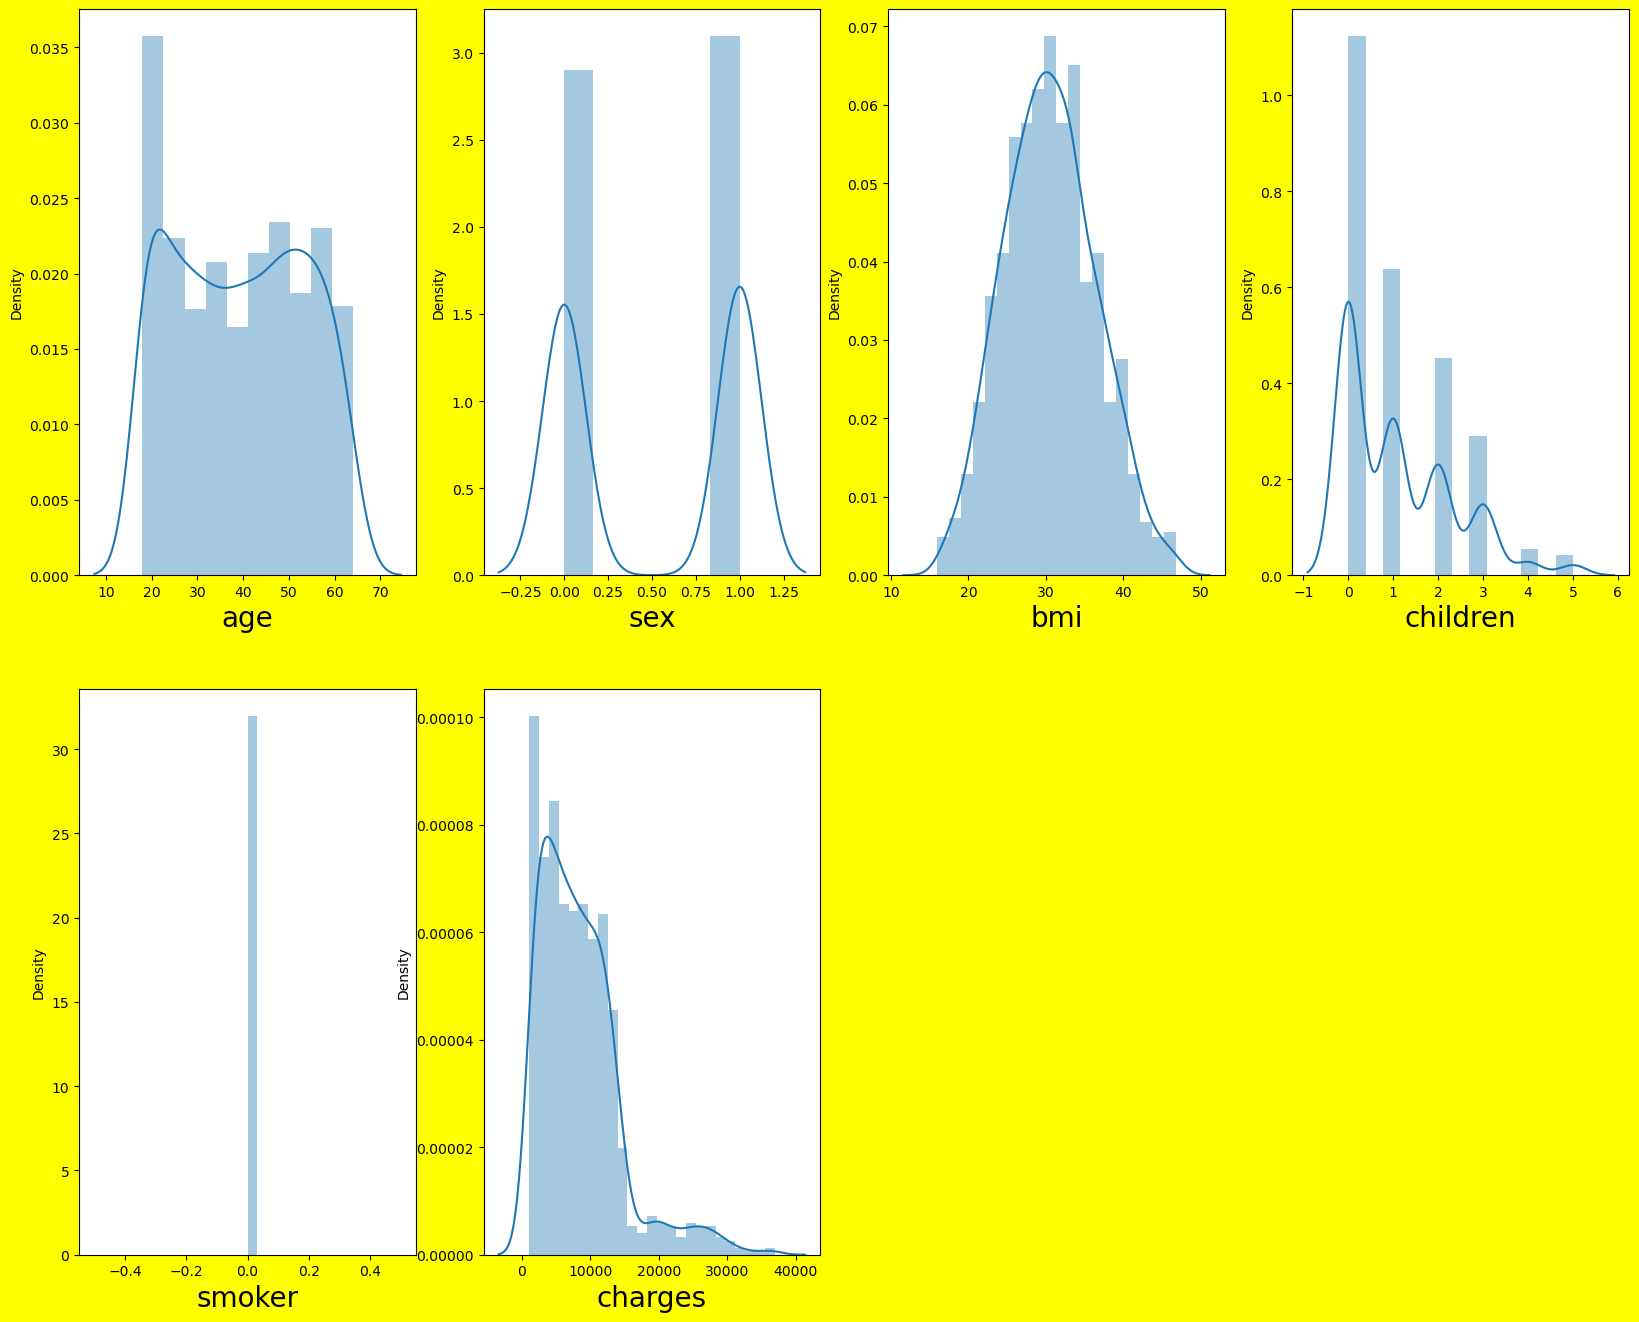

In [30]:
plt.figure(figsize=(20,25),facecolor= 'yellow')
plotnumber = 1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.show()

In [31]:
X = data.drop(columns= ['charges'])

y = data['charges']

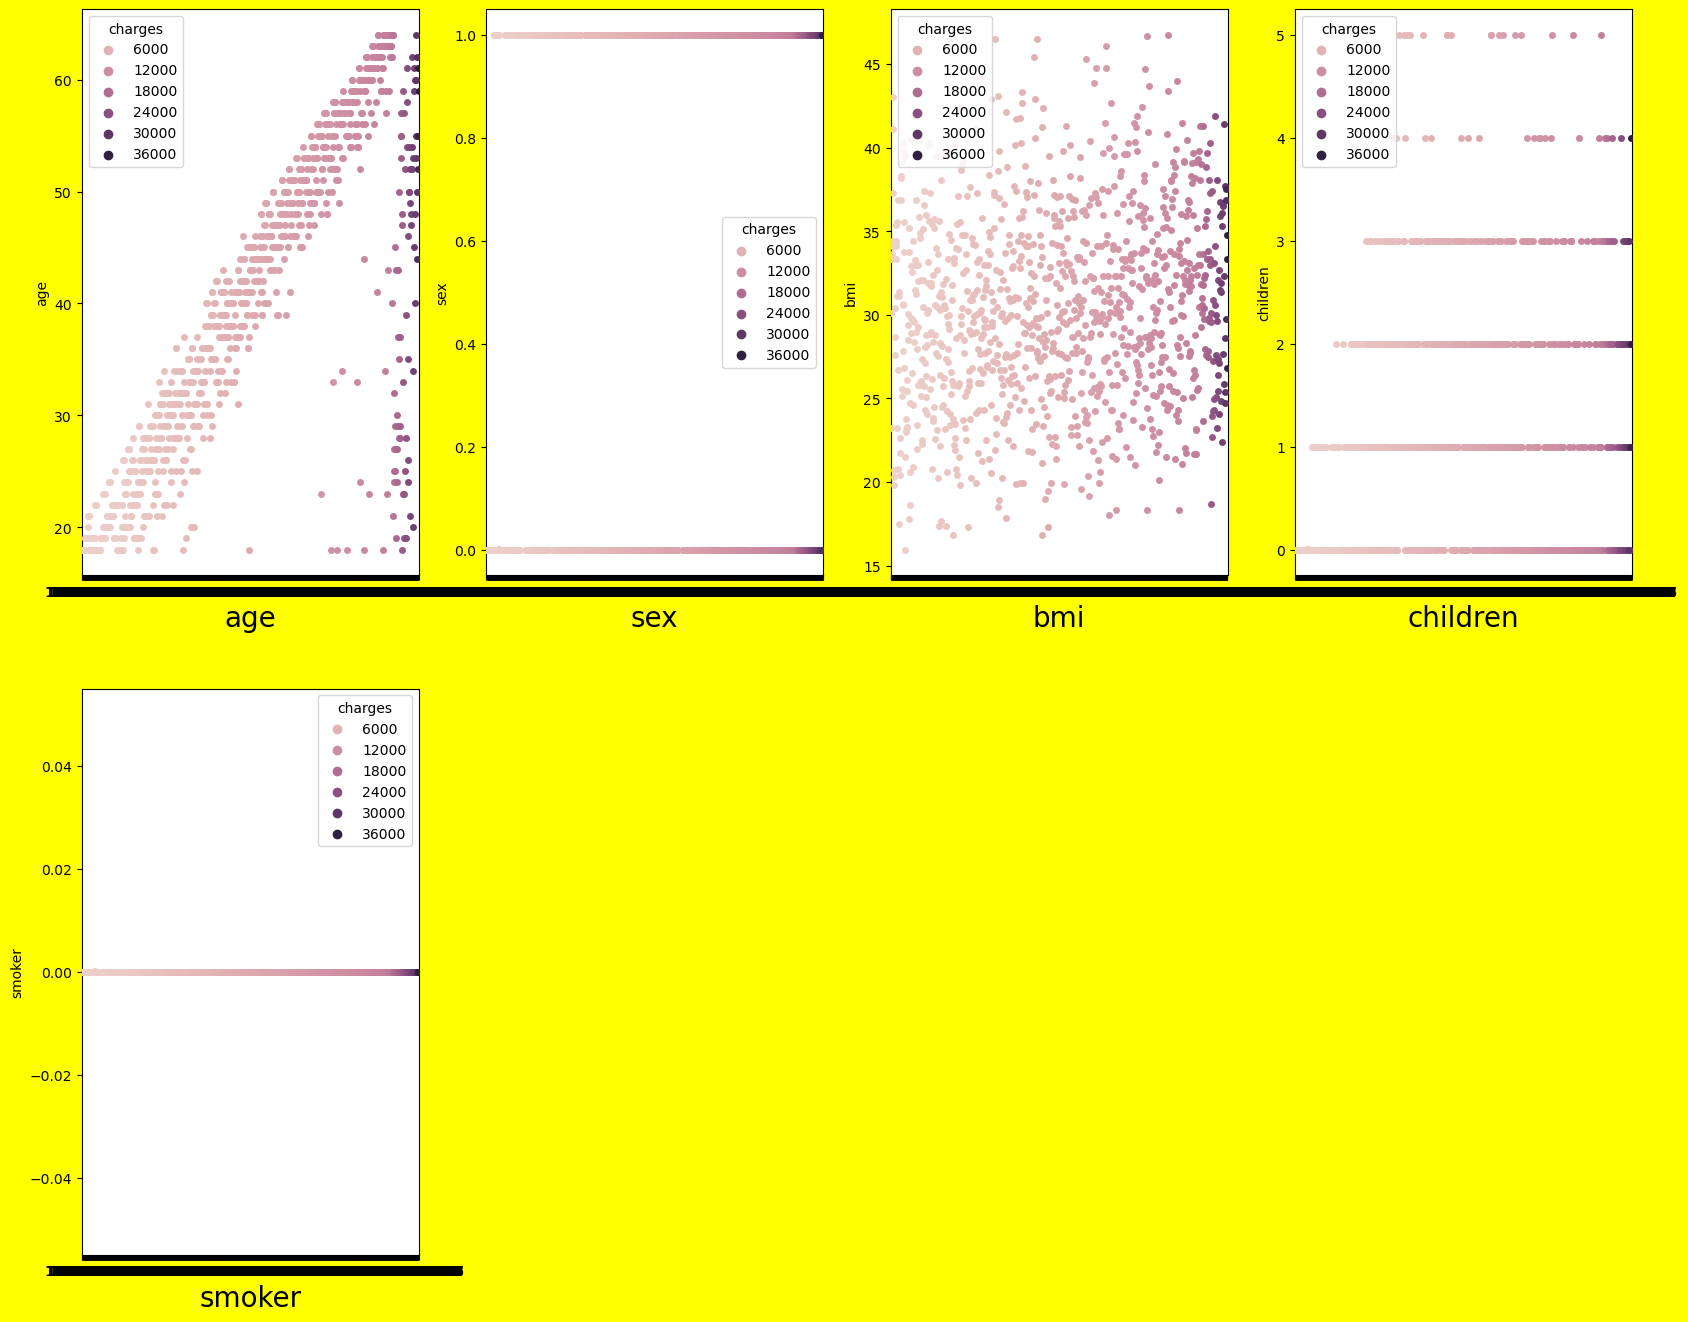

In [32]:
plt.figure(figsize=(20,25),facecolor= 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.stripplot(x=y, y=X[column],hue=y)
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.show()

In [33]:
scaler = StandardScaler()
X_sclaer = scaler.fit_transform(X)

In [34]:
X_sclaer

array([[-1.51919809, -1.03266948,  0.5474483 , -0.07516433,  0.        ],
       [-0.80856427, -1.03266948,  0.41670139,  1.56450295,  0.        ],
       [-0.45324736, -1.03266948, -1.3314017 , -0.89499797,  0.        ],
       ...,
       [-1.51919809,  0.96836405,  0.23331612, -0.89499797,  0.        ],
       [-1.51919809,  0.96836405,  1.07043592, -0.89499797,  0.        ],
       [-1.30600795,  0.96836405, -0.80586707, -0.89499797,  0.        ]])

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X_sclaer,y, test_size = 0.25, random_state= 348)

In [36]:
y_train.head()

10       2721.32080
849     10601.63225
346      4889.99950
1150     2203.73595
1203     9964.06000
Name: charges, dtype: float64

In [39]:
lin_regr = LinearRegression()
lin_regr.fit(x_train, y_train)

LinearRegression()

In [40]:
data.tail(2)

,age,sex,bmi,children,smoker,charges
1335,18,1,36.85,0,0,1629.8335
1336,21,1,25.80,0,0,2007.9450


In [41]:
lin_regr.predict(scaler.transform([[21,1,25.80,0,0]]))

array([3159.93152042])

In [42]:
lin_regr.predict(scaler.transform([[18,1,36.85,0,0]]))

array([2283.57115482])